In [1]:
# Reload extensions
%load_ext autoreload
%autoreload 2

In [2]:
from AlphaTools.alpha.alpha_MFI import MFIAlpha
from AlphaTools.dataset.stock import FutureDataset
import datetime

# 2. Split data

In [3]:
dataset = FutureDataset(
    stock_csv_path='../../data/data1mins.csv',
    exp_path='../../data/expiration_date.csv',
    train_test_split_time_point=datetime.datetime(2023, 1, 1, 0, 0, 0),
)
(train_data, test_data) = dataset.get_stock_data(method="sequence", split_date=datetime.datetime(2023, 1, 1, 0, 0, 0))[0]
expiration_date = dataset.get_expiration_date()

# 3. Run backtesting

100%|██████████| 326252/326252 [02:07<00:00, 2560.69it/s]


Margin: 10.21
MDD: 172.5 (11.03%)

   Total trading quantity: 1365
         Profit per trade: 1.55
             Total Profit: 2934.6
         Profit after fee: 2111.7
 Trading quantity per day: 1.01
 Profit per day after fee: 1.56
                   Return: 0.25
          Profit per year: 391.45
                  HitRate: 0.47
          HitRate per day: 0.57


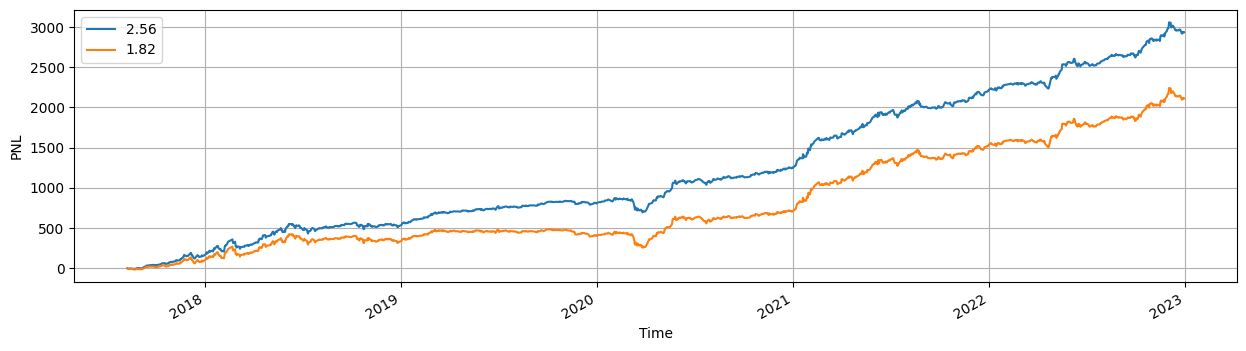

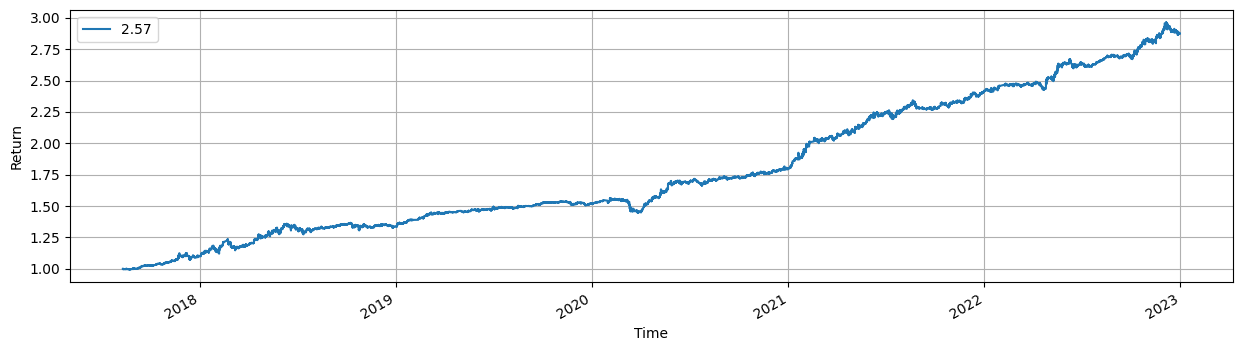

In [4]:
alpha = MFIAlpha(
    stock_data=train_data,
    expiration_date=expiration_date,
    mfi_period=27,
    mfi_upper=75,
    mfi_lower=24,
    mfi_middle_upper=71,
    mfi_middle_lower=19,
    lowpass_filter_ratio=0.394980788671196
)
res = alpha.backtest()